<a href="https://colab.research.google.com/github/King-Bowie/curso-introducao-data-science/blob/main/curso_introducao_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Olá pessoal, este conteúdo foi feito acompanhando e criando junto com a Alura no seu curso: Data Science: Primeiros passos .
###Os dados são propriedade do Grupo: GroupLens, The Movie Database

###Sites:
<a href="https://grouplens.org/datasets/movielens/">GroupLens - movielens</a>

<a href="hhttps://www.kaggle.com/tmdb/tmdb-movie-metadata"> The Movie Database - Kaggle</a>

#####Estamos usando datasets recomendados para estudos, Filmes: pequeno, com 100 mil avaliações, 3,6 mil tags aplicadas em 9 mil filmes dado por 600 usuarios.

#####versão: 9/2018

Fazendo esse curso de Data Science e:
<li>Explore dados com exploratory data analysis;</li>
<li>Conheça os tipos de variáveis;</li>
<li>Entenda o papel de visualizações como histogramas e boxplots;</li>
<li>Entenda a importância e dê os primeiros passos em visualizações;</li>
<li>Utilize medidas de resumo;</li>
<li>Explore seus dados em Python com Pandas, Matplotlib e Seaborn;</li>

##Aula 01: Conhecendo os dados e o Pandas e visualizando os dados com histograma.     :D

###Analisando as notas em geral

In [1]:
import pandas as pd
URL = 'https://raw.githubusercontent.com/King-Bowie/curso-introducao-data-science/main/dados/ratings.csv'
notas = pd.read_csv(URL)
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


###Com a função head() será possivel visualizar os 5 primeiros itens das avaliações.

In [2]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


###Com a função shape() podemos ver respectivamente a quantidade de linhas e colunas dos nossos dados. 

In [3]:
notas.shape

(100836, 4)

###Bem... percebemos que cada coluna não esta em portugês então vamos adaptar!!
com a função columns temos a possibilidade de trocar o nome de cada coluna!

In [4]:
notas.columns = ['usuarioId','filmeId','nota','momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Vamos ver a coluna colunas? Então vamos chama-la!  

In [5]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

###Quais são os notas possiveis? 

In [6]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

###Vamos contar os valores por notas? 

In [7]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

###Qual é a média das notas?

In [8]:
print('Média das notas:',notas['nota'].mean())

Média das notas: 3.501556983616962


###Qual é o valor que corta exatamente no meio? Nós chamamos ela de mediana (em Português e median em Inglês). 

In [9]:
print('Mediana das notas:',notas['nota'].median())

Mediana das notas: 3.5


###Então vamos criar um gráfico para ver a frequência que cada nota recebe.

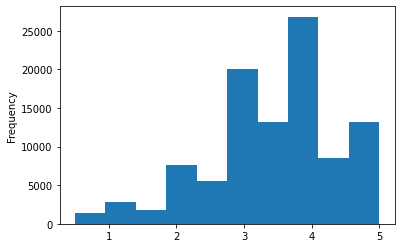

In [10]:
notas.nota.plot(kind='hist')

In [11]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


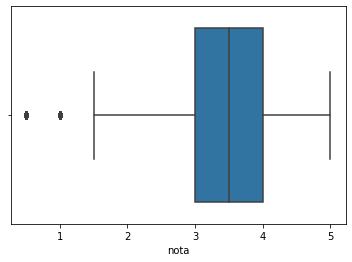

In [12]:
import seaborn as sns

sns.boxplot(notas.nota)

No gráfico acima vemos que a mediana (3.5) é a reta nesta caixa e 25% está para esquerda e 25% para direita, esses 2 traços (que parecem bigodes) são 25% dos 25% (de cada lado).
Então podermos concluir que olhando os dados visuais:
 <li>Metade das pessoas costumam dar notas entre 3 e 4. 
 <li>Lado direito-> 25% tem a tendência de dar notas entre 4 e 5 e no 
 <li>Lado da esquerda -> 25% tem a tendência de dar notas entre 1,5 e 3 
 <li>Poucas pessoas tendem a dar notas abaixo de 1.5

###O que aprendemos nessa aula?
<li>Importar pandas que é uma biblioteca de análise de dados;
<li>Ler dados CSV;
<li>Fazer upload de arquivo para o Google Colab;
<li>Renomear colunas;
<li>Contar dados;
<li>Melhorar a visualização das informações.

##Aula 2: Análise exploratória

###Olhando os filmes

In [13]:
URL_filmes_gp = 'https://raw.githubusercontent.com/King-Bowie/curso-introducao-data-science/main/dados/movies.csv'
filmes = pd.read_csv(URL_filmes_gp)
filmes.columns= ["filmeId","titulo","generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


###Analisando algumas notas especificas por filme

In [14]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [15]:
media_por_filme = notas.groupby("filmeId").mean()['nota']
media_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

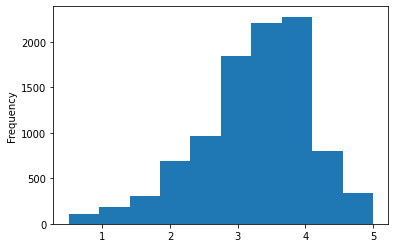

In [16]:
media_por_filme.plot(kind = 'hist')

Nesse gráfico acima podemos ver como se distribui as médias por filmes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


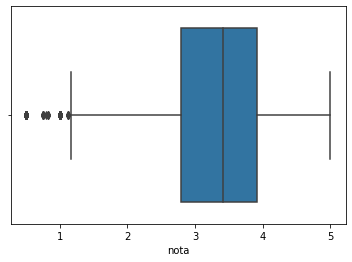

In [17]:
sns.boxplot(media_por_filme)

In [18]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

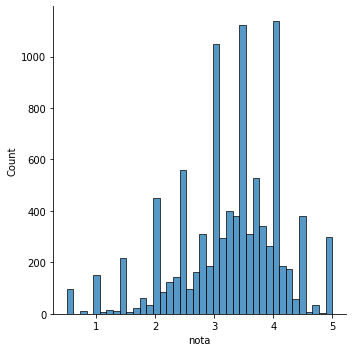

In [19]:
sns.displot(media_por_filme, bins=40)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

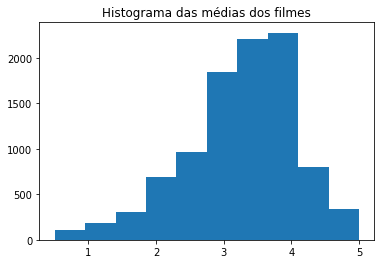

In [20]:
import matplotlib.pyplot as plt
plt.hist(media_por_filme)
plt.title("Histograma das médias dos filmes")

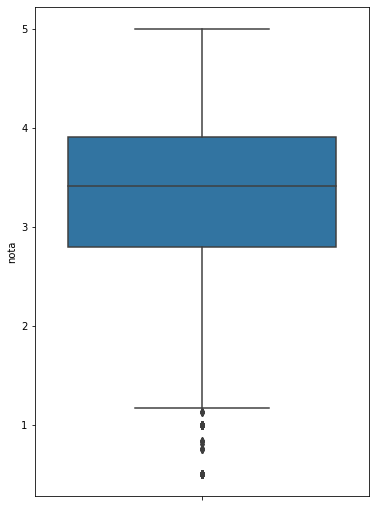

In [21]:
plt.figure(figsize=(6,9))
sns.boxplot(y=media_por_filme)

In [22]:
URL_filmes_tmdb = "https://raw.githubusercontent.com/King-Bowie/curso-introducao-data-science/main/dados/tmdb_5000_movies.csv"
tmdb = pd.read_csv(URL_filmes_tmdb)
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [23]:
tmdb.original_language.unique() #categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [24]:
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ar       2
cs       2
ta       2
id       2
ro       2
pl       1
ky       1
te       1
sl       1
el       1
af       1
vi       1
xx       1
nb       1
is       1
tr       1
hu       1
ps       1
no       1
Name: original_language, dtype: int64

In [25]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'fa', 'nl', 'he', 'th', 'ar', 'cs', 'ta', 'id', 'ro', 'pl',
       'ky', 'te', 'sl', 'el', 'af', 'vi', 'xx', 'nb', 'is', 'tr', 'hu', 'ps',
       'no'],
      dtype='object')

In [26]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [27]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


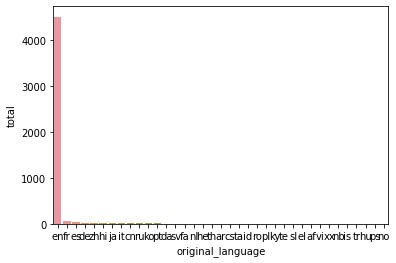

In [28]:
sns.barplot(x="original_language", y="total", data = contagem_de_lingua )

In [29]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles 
print(total_de_ingles,total_do_resto)

4505 298


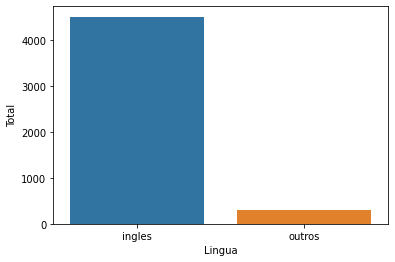

In [30]:
dados = {
    'Lingua' : ['ingles','outros'],
    'Total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x = "Lingua", y = "Total", data = dados)

In [41]:
total_de_outras_linguas_em_filmes = tmdb.query("original_language != 'en'")
total_de_outras_linguas_em_filmes

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,90414,"[{""id"": 187056, ""name"": ""woman director""}]",fr,"I Love You, Don't Touch Me!","The story of a 25 year old virgin girl, lookin...",0.020839,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-01-21,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just Your Typical Boy-Loves-Girl Who Doesn't L...,"I Love You, Don't Touch Me!",6.0,1
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of grueso

In [32]:
total_de_outras_linguas_em_filmes_contados = tmdb.query("original_language != 'en'")['original_language'].value_counts()
total_de_outras_linguas_em_filmes_contados

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ar     2
id     2
ro     2
ta     2
cs     2
vi     1
ps     1
hu     1
te     1
ky     1
no     1
is     1
sl     1
xx     1
pl     1
tr     1
af     1
nb     1
el     1
Name: original_language, dtype: int64

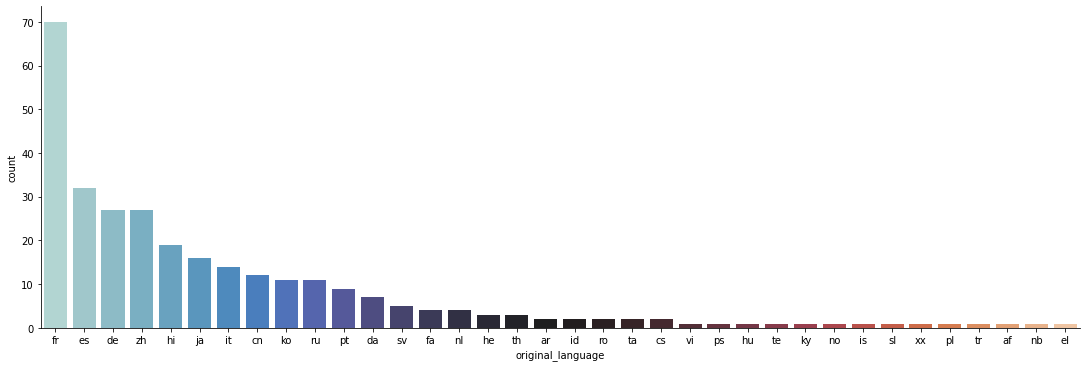

In [46]:
sns.catplot(x="original_language", kind = "count", 
            data = total_de_outras_linguas_em_filmes,
            aspect=3,
            order = total_de_outras_linguas_em_filmes_contados.index,
            #order = total_por_lingua_de_outros_filmes_contados,
            palette="icefire")

###Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, box plot e histograma.

In [34]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story),len(notas_do_jumanji))

215 110


In [35]:
print("Média da nota do Toy Story: %.2f" % notas_do_toy_story.nota.mean())
print("Média da nota do Jumanji: %.2f" % notas_do_jumanji.nota.mean())
print("Mediana da nota do Toy Story: %.2f" % notas_do_toy_story.nota.median())
print("Mediana da nota  do Jumanji: %.2f" % notas_do_jumanji.nota.median())

Média da nota do Toy Story: 3.92
Média da nota do Jumanji: 3.43
Mediana da nota do Toy Story: 4.00
Mediana da nota  do Jumanji: 3.50


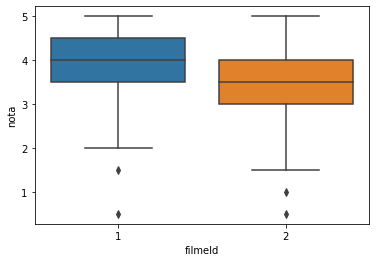

In [36]:
sns.boxplot(x="filmeId", y="nota", data = notas.query("filmeId in [1,2]"))

In [37]:
print("desvio padrao:",notas_do_toy_story.nota.std())
print("desvio padrao:",notas_do_jumanji.nota.std())

desvio padrao: 0.8348591407114045
desvio padrao: 0.8817134921476455


In [38]:
import numpy as np
 
print(np.std(notas_do_toy_story.nota),np.std(notas_do_jumanji.nota))

0.8329153449641146 0.8776965532969931
